In [1]:
# Import necessary libraries for salary prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
 
# Load the dataset
data = pd.read_csv('data/Salary Data.csv')
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# Salary Prediction Project
This notebook imports all necessary libraries for a salary prediction machine learning project and loads the dataset.

In [2]:
data["Education Level"].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

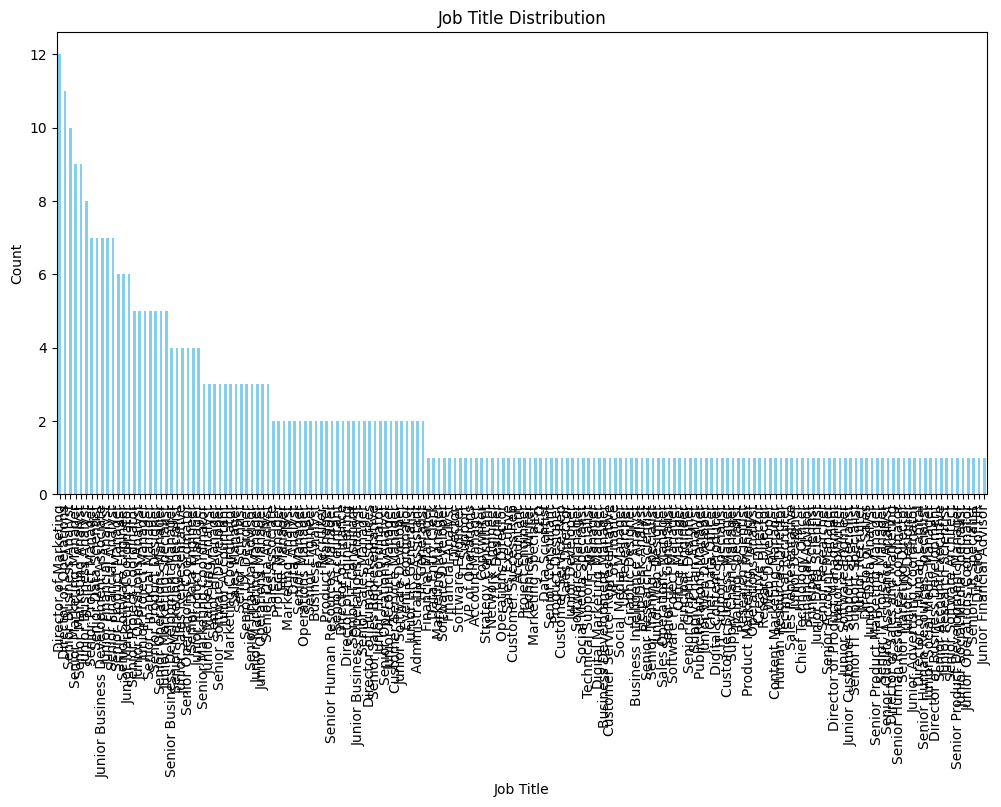

In [5]:
data["Job Title"].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Job Title Distribution') 
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
data["Gender"] = lb.fit_transform(data["Gender"])
data["Job Title"] = lb.fit_transform(data["Job Title"])



In [10]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
data["Education Level"] = oe.fit_transform(data[["Education Level"]])

In [11]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0.0,159,5.0,90000.0
1,28.0,0,1.0,17,3.0,65000.0
2,45.0,1,2.0,130,15.0,150000.0
3,36.0,0,0.0,101,7.0,60000.0
4,52.0,1,1.0,22,20.0,200000.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               375 non-null    int64  
 2   Education Level      373 non-null    float64
 3   Job Title            375 non-null    int64  
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 17.7 KB


In [18]:
data.isnull().sum()

Age                    2
Gender                 0
Education Level        2
Job Title              0
Years of Experience    2
Salary                 2
dtype: int64

In [19]:
data.dropna(inplace=True)

In [20]:
x= data.drop(columns=["Salary"])
y= data["Salary"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [21]:
model = LinearRegression()
themodel=model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Mean Squared Error: 249075656.4272197
R^2 Score: 0.8961138207821872
Train Accuracy: 0.9002701475524073
Test Accuracy: 0.8961138207821872


In [22]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f'Random Forest Mean Squared Error: {rf_mse}')
print(f'Random Forest R^2 Score: {rf_r2}')
print(f'Random Forest Train Accuracy: {rf_model.score(x_train, y_train)}')
print(f'Random Forest Test Accuracy: {rf_model.score(x_test, y_test)}')

Random Forest Mean Squared Error: 143564355.423075
Random Forest R^2 Score: 0.9401211962232473
Random Forest Train Accuracy: 0.9875789592610296
Random Forest Test Accuracy: 0.9401211962232473


In [15]:
x_train.head()

,Age,Gender,Education Level,Job Title,Years of Experience
193,34.0,1,0.0,141,7.0
75,37.0,1,0.0,96,10.0
84,29.0,0,0.0,56,2.0
363,33.0,1,0.0,65,5.0
16,33.0,0,1.0,83,7.0


In [23]:
import joblib
joblib.dump(rf_model, 'salary_prediction_model.pkl')

['salary_prediction_model.pkl']